In [ ]:
sdf_dir_chiral = "/gs/fs/tga-ohuelab/sakano/git/Vina_T4_Queue/ligands/sdf_chiral"
sdf_dir_no_chiral = "/gs/fs/tga-ohuelab/sakano/git/Vina_T4_Queue/ligands/sdf_no_chiral"
sdf_dir_coconut = "/gs/fs/tga-ohuelab/sakano/git/Vina_T4_Queue/ligands/sdf_coconut"

In [1]:
import os
from rdkit import Chem
from rdkit.rdBase import DisableLog
from tqdm import tqdm

DisableLog("rdApp.info")
DisableLog("rdApp.warning")
DisableLog("rdApp.error")


def get_mols(sdf_dir):
    mols = []
    for filename in tqdm(os.listdir(sdf_dir), desc="Reading SDF files"):
        if filename.endswith(".sdf"):
            mol = Chem.SDMolSupplier(os.path.join(sdf_dir, filename))[0]
            mols.append(mol)
    return mols


mols_chiral = get_mols(sdf_dir_chiral)
mols_no_chiral = get_mols(sdf_dir_no_chiral)
mols_coconut = get_mols(sdf_dir_coconut)

print(f"Chiral mols: {len(mols_chiral)}")
print(f"No chiral mols: {len(mols_no_chiral)}")
print(f"COCONUT mols: {len(mols_coconut)}")

NameError: name 'sdf_dir_chiral' is not defined

In [ ]:
from rdkit.Chem import QED


def get_qeds(mols):
    qeds = []
    for mol in tqdm(mols, desc="Calculating QED"):
        qed = QED.qed(mol)
        qeds.append(qed)
    return qeds


qed_chiral = get_qeds(mols_chiral)
qed_no_chiral = get_qeds(mols_no_chiral)
qed_coconut = get_qeds(mols_coconut)

print(f"Chiral QED: {sum(qed_chiral) / len(qed_chiral)}")
print(f"No chiral QED: {sum(qed_no_chiral) / len(qed_no_chiral)}")
print(f"COCONUT QED: {sum(qed_coconut) / len(qed_coconut)}")

Calculating QED: 100%|██████████| 9928/9928 [00:10<00:00, 988.12it/s] 

Chiral QED: 0.36057819790572204
No chiral QED: 0.33831640969006316
COCONUT QED: 0.4070086974356048


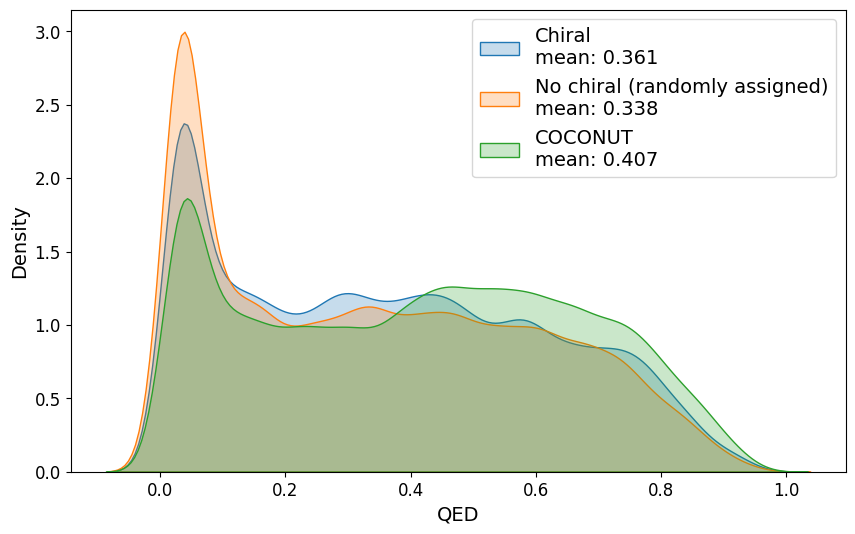

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_qed_chiral = sum(qed_chiral) / len(qed_chiral)
mean_qed_no_chiral = sum(qed_no_chiral) / len(qed_no_chiral)
mean_qed_coconut = sum(qed_coconut) / len(qed_coconut)

plt.figure(figsize=(10, 6))
sns.kdeplot(
    qed_chiral, label=f"Chiral\nmean: {mean_qed_chiral:.3f}", bw_adjust=0.75, fill=True
)
sns.kdeplot(
    qed_no_chiral,
    label=f"No chiral (randomly assigned)\nmean: {mean_qed_no_chiral:.3f}",
    bw_adjust=0.75,
    fill=True,
)
sns.kdeplot(
    qed_coconut,
    label=f"COCONUT\nmean: {mean_qed_coconut:.3f}",
    bw_adjust=0.75,
    fill=True,
)
plt.xlabel("QED", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

Calculating MW: 100%|██████████| 9928/9928 [00:00<00:00, 517891.30it/s]


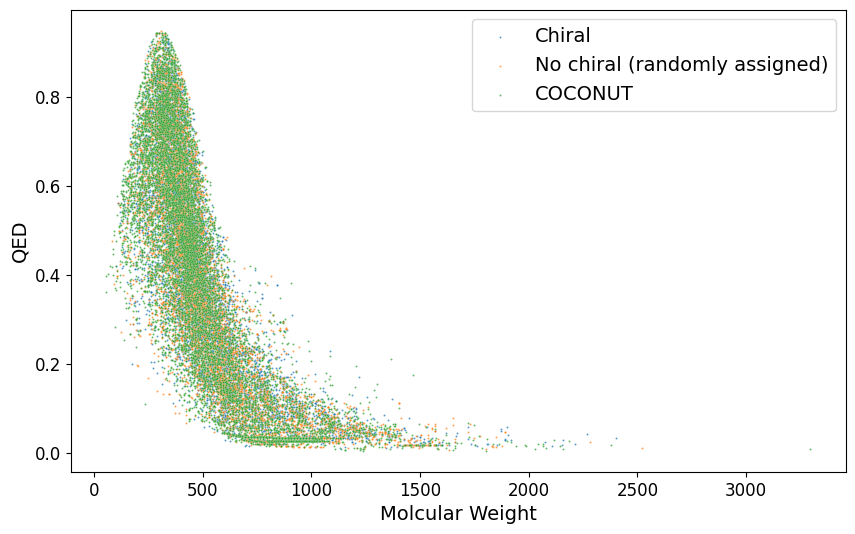

In [ ]:
from rdkit.Chem import Descriptors


def get_mws(mols):
    mws = []
    for mol in tqdm(mols, desc="Calculating MW"):
        mw = Descriptors.ExactMolWt(mol)
        mws.append(mw)
    return mws


mws_chiral = get_mws(mols_chiral)
mws_no_chiral = get_mws(mols_no_chiral)
mws_coconut = get_mws(mols_coconut)

# plot MW and QED
plt.figure(figsize=(10, 6))
sns.scatterplot(
    {"MW": mws_chiral, "QED": qed_chiral},
    x="MW",
    y="QED",
    label="Chiral",
    s=2,
    alpha=0.75,
)
sns.scatterplot(
    {"MW": mws_no_chiral, "QED": qed_no_chiral},
    x="MW",
    y="QED",
    label="No chiral (randomly assigned)",
    s=2,
    alpha=0.75,
)
sns.scatterplot(
    {"MW": mws_coconut, "QED": qed_coconut},
    x="MW",
    y="QED",
    label="COCONUT",
    s=2,
    alpha=0.75,
)
plt.xlabel("Molcular Weight", fontsize=14)
plt.ylabel("QED", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

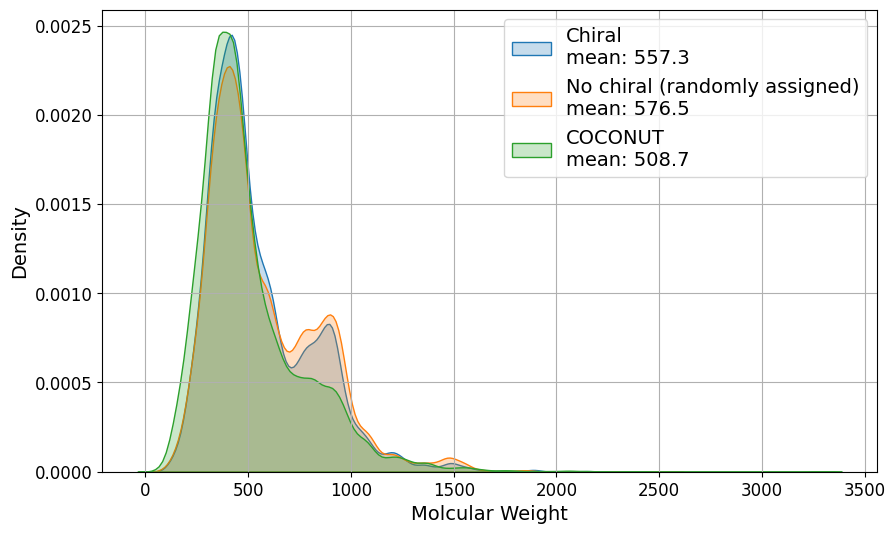

In [ ]:
mean_mw_chiral = sum(mws_chiral) / len(mws_chiral)
mean_mw_no_chiral = sum(mws_no_chiral) / len(mws_no_chiral)
mean_mw_coconut = sum(mws_coconut) / len(mws_coconut)

plt.figure(figsize=(10, 6))
sns.kdeplot(
    mws_chiral,
    label=f"Chiral\nmean: {mean_mw_chiral:.1f}",
    bw_adjust=0.75,
    fill=True,
)
sns.kdeplot(
    mws_no_chiral,
    label=f"No chiral (randomly assigned)\nmean: {mean_mw_no_chiral:.1f}",
    bw_adjust=0.75,
    fill=True,
)
sns.kdeplot(
    mws_coconut,
    label=f"COCONUT\nmean: {mean_mw_coconut:.1f}",
    bw_adjust=0.75,
    fill=True,
)
plt.xlabel("Molcular Weight", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [ ]:
# 分子量 700 - 1000 のところに COCONUT にいないような分子が生成されているのでチェック
import numpy as np
from rdkit.Chem import Draw

mws_chiral = np.array(mws_chiral)
mws_no_chiral = np.array(mws_no_chiral)
mws_coconut = np.array(mws_coconut)

mws_chiral_filtered_indices = np.where((mws_chiral >= 700) & (mws_chiral <= 1000))[0]
mws_no_chiral_filtered_indices = np.where(
    (mws_no_chiral >= 700) & (mws_no_chiral <= 1000)
)[0]
mws_coconut_filtered_indices = np.where((mws_coconut >= 700) & (mws_coconut <= 1000))[0]

mols_chiral_filtered = [mols_chiral[i] for i in mws_chiral_filtered_indices]
mols_no_chiral_filtered = [mols_no_chiral[i] for i in mws_no_chiral_filtered_indices]
mols_coconut_filtered = [mols_coconut[i] for i in mws_coconut_filtered_indices]

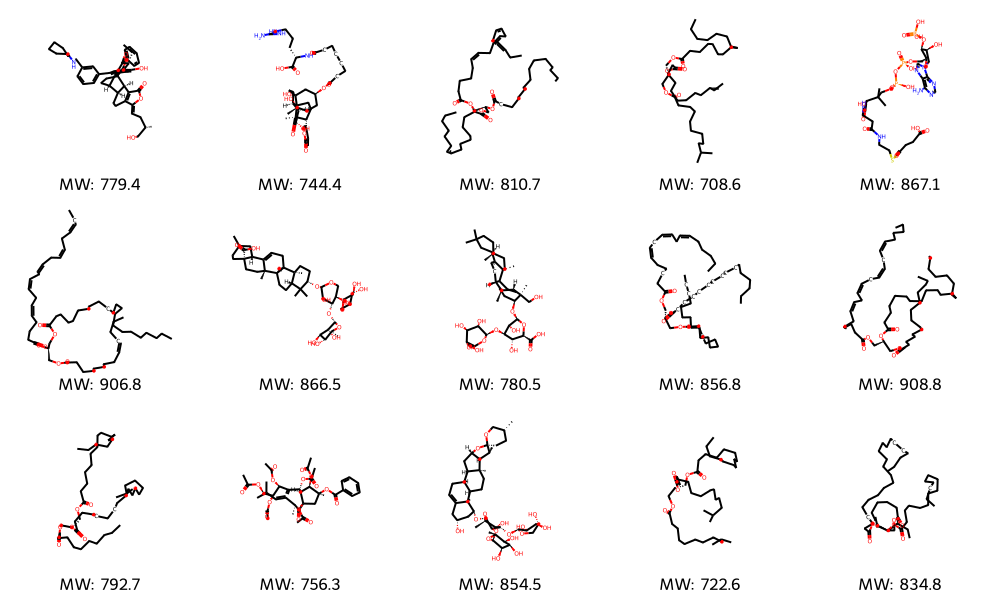

In [ ]:
Draw.MolsToGridImage(
    mols_chiral_filtered[:15],
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[f"MW: {mw:.1f}" for mw in mws_chiral[mws_chiral_filtered_indices[:15]]],
)

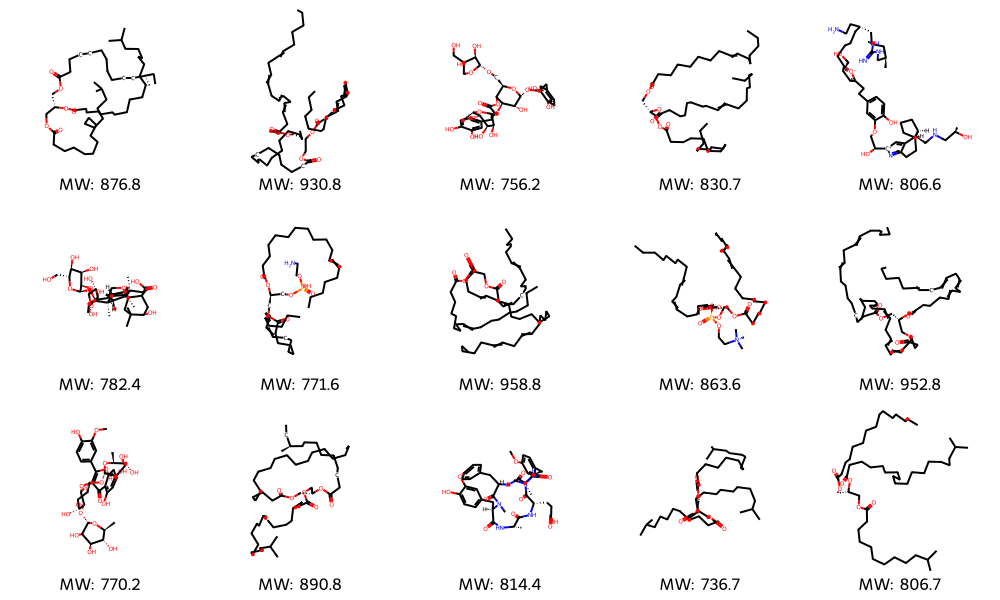

In [ ]:
Draw.MolsToGridImage(
    mols_no_chiral_filtered[:15],
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[f"MW: {mw:.1f}" for mw in mws_no_chiral[mws_no_chiral_filtered_indices[:15]]],
)

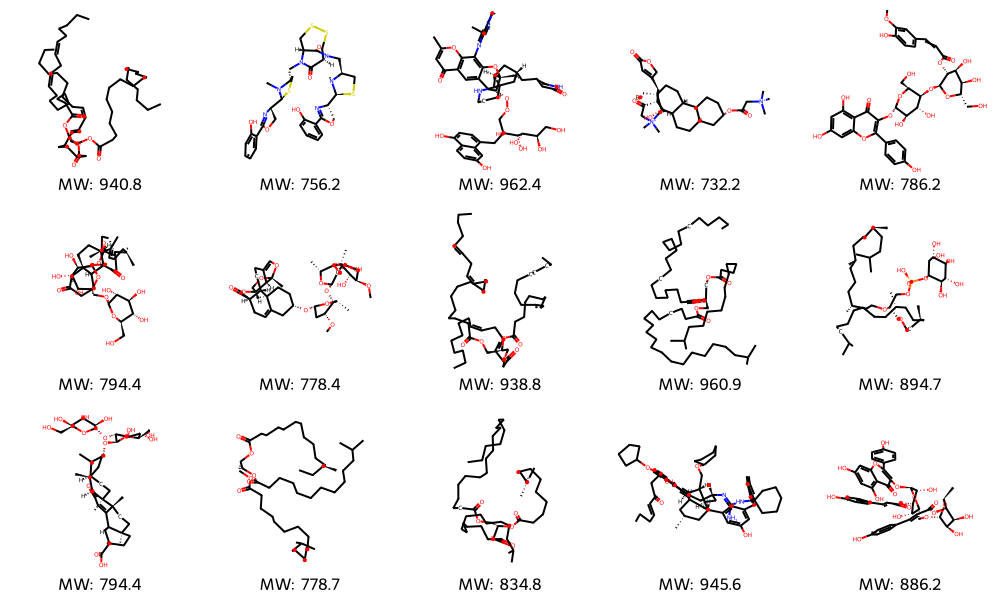

In [ ]:
Draw.MolsToGridImage(
    mols_coconut_filtered[:15],
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[f"MW: {mw:.1f}" for mw in mws_coconut[mws_coconut_filtered_indices[:15]]],
)

In [ ]:
from rdkit.Chem import rdForceFieldHelpers, Mol
from rdkit.Chem import AllChem
import pandas as pd


def get_energy(mol: Mol):
    uff = AllChem.UFFGetMoleculeForceField(mol)
    if uff is None:
        uff_energy = None
    else:
        uff_energy = uff.CalcEnergy()
    mmff_props = AllChem.MMFFGetMoleculeProperties(mol)
    mmff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props)
    if mmff is None:
        mmff_energy = None
    else:
        mmff_energy = mmff.CalcEnergy()

    return {"UFF": uff_energy, "MMFF": mmff_energy}


energies_chiral = pd.DataFrame(
    [get_energy(mol) for mol in tqdm(mols_chiral, desc="Calculating energies")]
)
energies_no_chiral = pd.DataFrame(
    [get_energy(mol) for mol in tqdm(mols_no_chiral, desc="Calculating energies")]
)
energies_coconut = pd.DataFrame(
    [get_energy(mol) for mol in tqdm(mols_coconut, desc="Calculating energies")]
)

Calculating energies: 100%|██████████| 9928/9928 [00:09<00:00, 1092.05it/s]


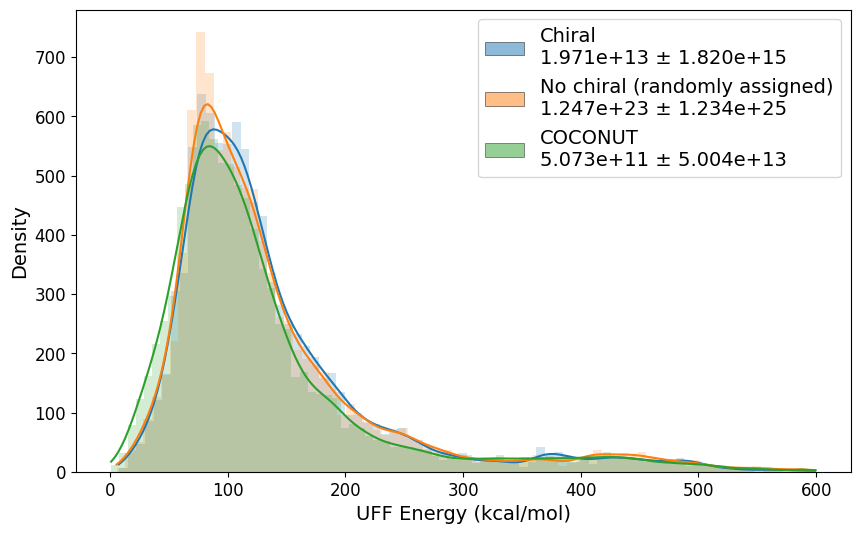

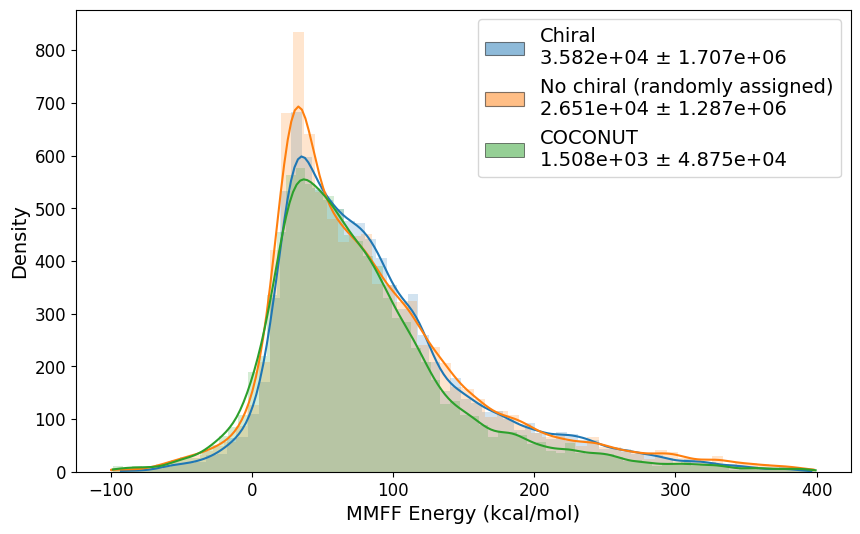

In [ ]:
def plot(data_list, key, range_=(0, 600)):
    plt.figure(figsize=(10, 6))
    for data in data_list:
        df = data["DataFrame"]
        label = f"{data['Label']}\n{df[key].mean():.3e} ± {df[key].std():.3e}"
        sns.histplot(
            df[(range_[0] < df[key]) & (df[key] < range_[1])].dropna()[key],
            label=label,
            alpha=0.2,
            kde=True,
            edgecolor=(0, 0, 0, 0),
            kde_kws={"bw_adjust": 0.75},
        )
    plt.xlabel(f"{key} Energy (kcal/mol)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    leg = plt.legend(fontsize=14)
    for lh in leg.legend_handles:
        if lh is not None:
            lh.set_alpha(0.5)
    plt.show()


data_list = [
    {"DataFrame": energies_chiral, "Label": "Chiral"},
    {"DataFrame": energies_no_chiral, "Label": "No chiral (randomly assigned)"},
    {"DataFrame": energies_coconut, "Label": "COCONUT"},
]
plot(data_list, "UFF", (0, 600))
plot(data_list, "MMFF", (-100, 400))

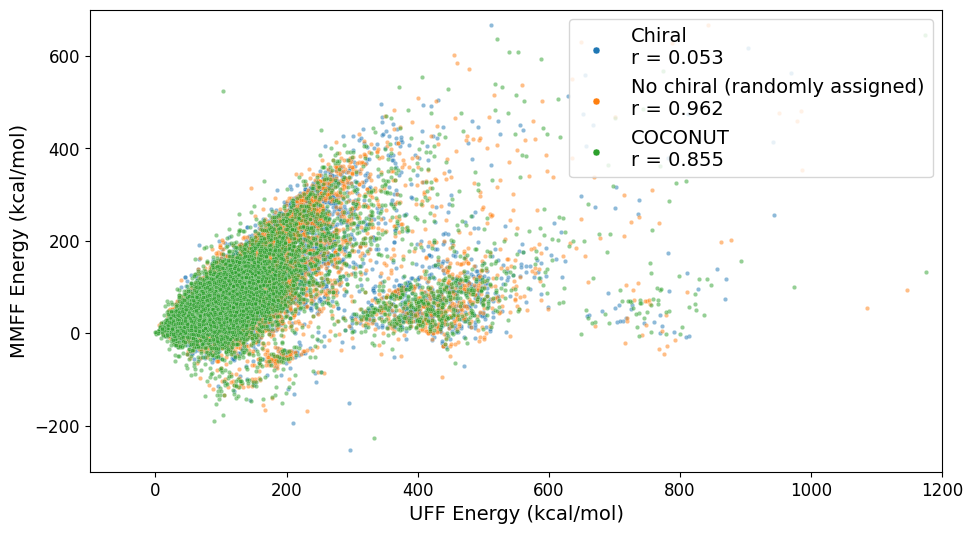

In [ ]:
plt.figure(figsize=(11, 6))
for data in data_list:
    df = data["DataFrame"]
    pearson_corr = df.corr(method="pearson")["MMFF"]["UFF"]
    label = f"{data['Label']}\nr = {pearson_corr:.3f}"
    sns.scatterplot(x="UFF", y="MMFF", data=df, label=label, alpha=0.5, s=10)
plt.xlabel("UFF Energy (kcal/mol)", fontsize=14)
plt.ylabel("MMFF Energy (kcal/mol)", fontsize=14)
plt.xlim(-100, 1200)
plt.ylim(-300, 700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
leg = plt.legend(fontsize=14)
for lh in leg.legend_handles:
    if lh is not None:
        lh._sizes = [25]
        lh.set_alpha(1)
plt.show()

In [ ]:
# Calculate Pearson correlation between UFF energy and molecular weight
uff_mw_corr_chiral = pd.DataFrame({'UFF': energies_chiral['UFF'], 'MW': mws_chiral}).corr().iloc[0,1]
uff_mw_corr_no_chiral = pd.DataFrame({'UFF': energies_no_chiral['UFF'], 'MW': mws_no_chiral}).corr().iloc[0,1]
uff_mw_corr_coconut = pd.DataFrame({'UFF': energies_coconut['UFF'], 'MW': mws_coconut}).corr().iloc[0,1]

# Create scatter plot for UFF energy vs MW
plt.figure(figsize=(11, 6))

# Plot each dataset with correlation in the label
sns.scatterplot(
    x=mws_chiral, 
    y=energies_chiral['UFF'], 
    label=f"Chiral\nr = {uff_mw_corr_chiral:.3f}",
    alpha=0.5, 
    s=10
)
sns.scatterplot(
    x=mws_no_chiral, 
    y=energies_no_chiral['UFF'], 
    label=f"No chiral (randomly assigned)\nr = {uff_mw_corr_no_chiral:.3f}",
    alpha=0.5, 
    s=10
)
sns.scatterplot(
    x=mws_coconut, 
    y=energies_coconut['UFF'], 
    label=f"COCONUT\nr = {uff_mw_corr_coconut:.3f}",
    alpha=0.5, 
    s=10
)

plt.xlabel("Molecular Weight", fontsize=14)
plt.ylabel("UFF Energy (kcal/mol)", fontsize=14)
plt.xlim(0, 1200)
plt.ylim(-100, 1200)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
leg = plt.legend(fontsize=14)
for lh in leg.legend_handles:
    if lh is not None:
        lh._sizes = [25]
        lh.set_alpha(1)
plt.grid(alpha=0.3)
plt.show()